<a href="https://colab.research.google.com/github/NINI0407/CNN-Assignment-2025/blob/main/ACS111101_CNN_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# CNN Classroom Exercise: Image Classification with CIFAR-10
# Objective: Practice building, training, and evaluating a CNN using TensorFlow/Keras
# Environment: Google Colab with GPU
# Dataset: CIFAR-10 (10 classes of 32x32 color images)

# Step 1: Import Libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [20]:
# Step 2: Load and Preprocess CIFAR-10 Dataset
# CIFAR-10 contains 60,000 32x32 color images in 10 classes (e.g., airplane, cat, dog)
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to range [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define class names for visualization
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

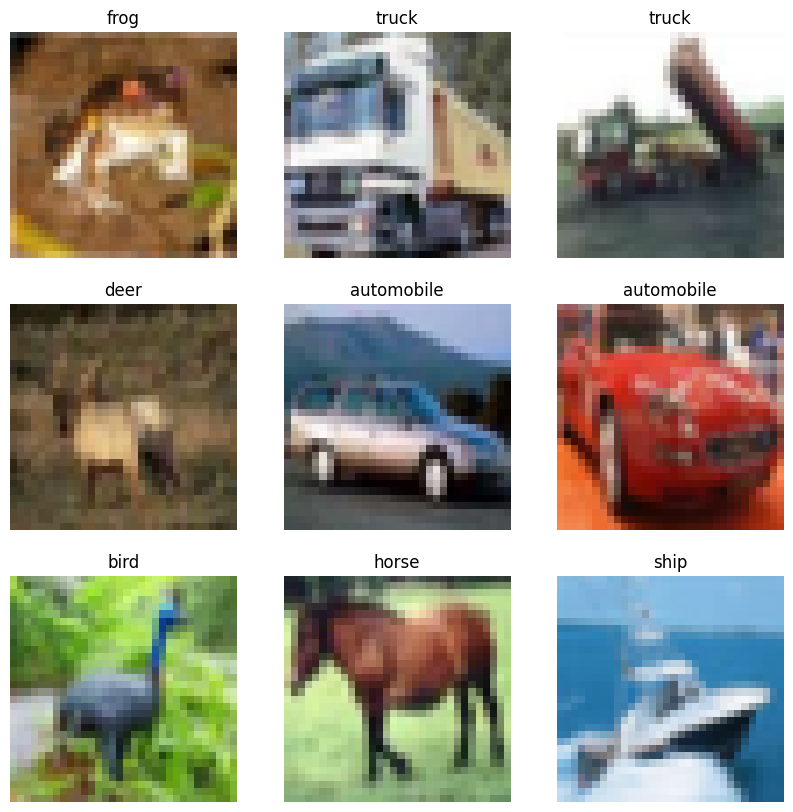

In [21]:
# Step 3: Visualize Sample Data
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(train_images[i])
    plt.title(class_names[train_labels[i][0]])
    plt.axis('off')
plt.show()

In [22]:
# Step 4: Build the CNN Model
model = models.Sequential([
    # Convolutional Layer 1: 32 filters, 3x3 kernel, ReLU activation
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),

    # Convolutional Layer 2: 64 filters, 3x3 kernel
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),

    # new
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),

    # Convolutional Layer 3: 64 filters, 3x3 kernel
    layers.Conv2D(256, (3, 3), activation='relu'),

    # Flatten the output for dense layers
    layers.Flatten(),

    # Dense Layer: 64 units
    layers.Dense(64, activation='relu'),

    # Output Layer: 10 units (one per class) with softmax
    layers.Dense(10, activation='softmax')
])

# Display model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 30, 30, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 15, 15, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 1, 1, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 424,842 (1.62 MB)

 Trainable params: 424,842 (1.62 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
# Step 5: Compile the Model
from tensorflow.keras.optimizers import Adam
optimizer = Adam(
    learning_rate=0.0005,   # 預設是 0.001
    beta_1=0.95,        # 類似 momentum，用於一階矩估計
    beta_2=0.995       # 類似 RMSprop 的 rho，用於二階矩估計
)
model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 建立資料增強器（加上旋轉、平移、水平翻轉）
datagen = ImageDataGenerator(
    rotation_range=15,           # 旋轉角度 ±15 度
    width_shift_range=0.1,         # 水平平移 ±10%
    height_shift_range=0.1,        # 垂直平移 ±10%
    horizontal_flip=True          # 隨機水平翻轉
)

# 必須要先 fit 一次（只對部分增強操作有用，像 ZCA whitening）
datagen.fit(train_images)

In [33]:
# Step 6: Train the Model
history = model.fit(
    train_images, train_labels,
    epochs=10,
    batch_size=128,
    validation_data=(test_images, test_labels))


Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 200s 506ms/step - accuracy: 0.7395 - loss: 0.7399 - val_accuracy: 0.7379 - val_loss: 0.7609
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 209s 523ms/step - accuracy: 0.7558 - loss: 0.6971 - val_accuracy: 0.7532 - val_loss: 0.7232
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 231s 444ms/step - accuracy: 0.7675 - loss: 0.6627 - val_accuracy: 0.7508 - val_loss: 0.7197
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 176s 450ms/step - accuracy: 0.7748 - loss: 0.6379 - val_accuracy: 0.7606 - val_loss: 0.6998
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 201s 448ms/step - accuracy: 0.7812 - loss: 0.6157 - val_accuracy: 0.7736 - val_loss: 0.6741
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 203s 451ms/step - accuracy: 0.7935 - loss: 0.5866 - val_accuracy: 0.7681 - val_loss: 0.6787
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 196s 435ms/step - accuracy: 0.7986 - loss: 0.5754 - val_accuracy: 0.7770 - val_loss: 0.6548
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 201s 432ms/step - accuracy: 0.8084 -

In [34]:
# Step 7: Evaluate the Model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")


313/313 - 7s - 22ms/step - accuracy: 0.7773 - loss: 0.6623

Test accuracy: 0.7773


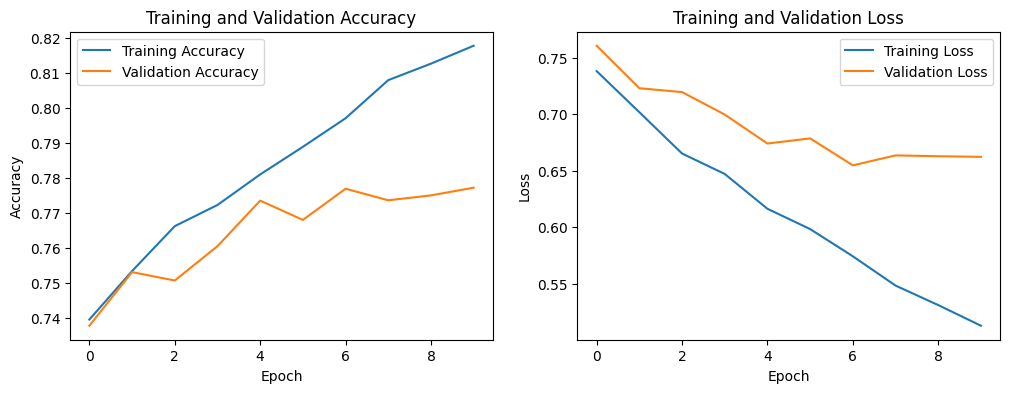

In [35]:

# Step 8: Plot Training and Validation Accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [36]:
# Step 9: Make Predictions
predictions = model.predict(test_images[:5])
for i in range(5):
    predicted_label = class_names[np.argmax(predictions[i])]
    true_label = class_names[test_labels[i][0]]
    print(f"Image {i+1}: Predicted: {predicted_label}, True: {true_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
Image 1: Predicted: cat, True: cat
Image 2: Predicted: ship, True: ship
Image 3: Predicted: automobile, True: ship
Image 4: Predicted: airplane, True: airplane
Image 5: Predicted: frog, True: frog


313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step


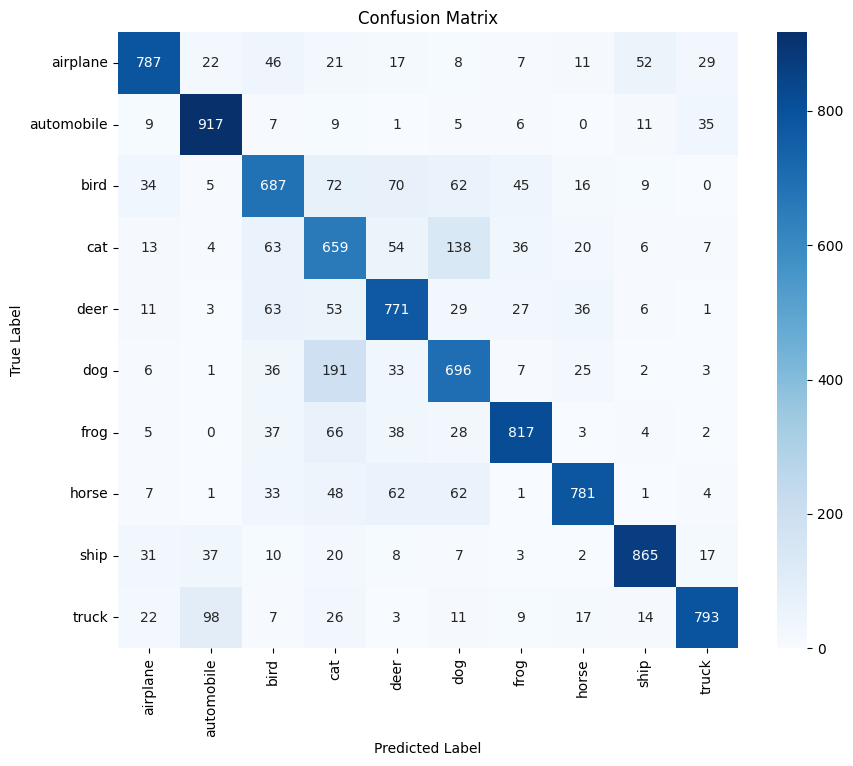

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 取得預測結果
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_labels.flatten()  # 把 (10000, 1) 改成 (10000,)

# 取得混淆矩陣
cm = confusion_matrix(true_classes, predicted_classes)

# 類別名稱（CIFAR-10）
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# 繪圖
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [38]:
# Step 10: Save Model Performance for Autograding
# This cell saves the model performance to a text file for GitHub Actions
try:
    # Get final training accuracy
    final_train_acc = history.history['accuracy'][-1]
    final_val_acc = history.history['val_accuracy'][-1]
    final_train_loss = history.history['loss'][-1]
    final_val_loss = history.history['val_loss'][-1]

    # Create performance summary
    performance_text = f"""Model Performance Summary:
Test Accuracy: {test_acc:.4f}
Test Loss: {test_loss:.4f}
Final Training Accuracy: {final_train_acc:.4f}
Final Validation Accuracy: {final_val_acc:.4f}
Final Training Loss: {final_train_loss:.4f}
Final Validation Loss: {final_val_loss:.4f}
Training Epochs: {len(history.history['accuracy'])}
Model Parameters: {model.count_params()}"""

    # Save to file for GitHub Actions
    with open('model_accuracy.txt', 'w') as f:
        f.write(performance_text)

    print("Model performance saved to model_accuracy.txt")
    print(performance_text)

except Exception as e:
    print(f"Error saving model performance: {e}")
    # Create a basic file even if there's an error
    with open('model_accuracy.txt', 'w') as f:
        f.write(f"Model execution completed with errors: {e}")

Model performance saved to model_accuracy.txt
Model Performance Summary:
Test Accuracy: 0.7773
Test Loss: 0.6623
Final Training Accuracy: 0.8178
Final Validation Accuracy: 0.7773
Final Training Loss: 0.5126
Final Validation Loss: 0.6623
Training Epochs: 10
Model Parameters: 424842


## Task 5:

1.   增加filter數量(64->128)：
      * 發生overfitting，training的loss可以小於0.6但validation的loss卻大於0.8
      * 結果：Test Accuracy: 0.7325。Test Loss: 0.8185
      * 分析：可能是模型複雜度太高，造成學習到太多雜訊以至於訓練時很有效但測試時效果不好
2.   增加捲基層數量、加入dropout：
      * dropout讓模型變深可以學到更複雜的特徵，提升模型泛化的能力，由圖表可知依照此方式確實可以避免Overfitting
      * 結果：Test Accuracy: 0.7158。Test Loss: 0.8399
3.   加入ImageDataGenerator
      * 將照片旋轉、水平移動、垂直移動等動作增加訓練資料的多樣性降低overfitting，實驗結果確實讓loss降低accuracy增加
      * 結果：Test Accuracy: 0.7633。Test Loss: 0.
      * 分析：實驗結果可以發現模型泛化能力更好了
4.   調整Adam的learning rate
      * 降低為0.0005(預設是0.001)讓模型較容易找到global minimum
      * 結果：Test Accuracy: 0.7311。Test Loss: 0.7717
5.   調整Adam參數
      * beta_1=0.95, beta_2=0.995
      * 結果：Test Accuracy: 0.7773。Test Loss: 0.6623

### 可以改進的地方
1. 可以嘗試加入Batch Normalizatio這是另一種讓模型泛化的功能，可以讓梯度更穩定
2. 增加Epoch
3. 搭配early stopping讓模型可以停留在最佳狀態，避免過度訓練



